In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import pickle

In [2]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri

In [3]:
out = {'Austin-to-SanDiego' :pickle.load(open('../predictions/params-lr-tf-Austin-SanDiego-all.pkl','r')),
       'SanDiego-to-Austin':pickle.load(open('../predictions/params-lr-tf-SanDiego-Austin-all.pkl','r'))}
iterations = {}
home = {}
season = {}
lr = {}
       
for stot in ['Austin-to-SanDiego', 'SanDiego-to-Austin']:
        iterations[stot] = {}
        home[stot] = {}
        season[stot] = {}
        lr[stot] = {}
        for method in ['transfer', 'normal']:
            iterations[stot][method] = {}
            home[stot][method] = {}
            season[stot][method] = {}
            lr[stot][method] = {}


            for train_percentage in [6,7,8,9,10,15,20,30,40,50,60,70,80,90,100]:
                iterations[stot][method][train_percentage] = {}
                for iters in [100, 700, 1300]:
                    iterations[stot][method][train_percentage][iters] = 0

                home[stot][method][train_percentage] = {}
                for h in range(3,6):
                    home[stot][method][train_percentage][h] = 0

                season[stot][method][train_percentage] = {}
                for s in range(2,5):
                    season[stot][method][train_percentage][s] = 0

                lr[stot][method][train_percentage] = {}
                for l in [0.1, 0.5, 1, 2]:
                    lr[stot][method][train_percentage][l] = 0

                for random_seed in range(5):
                    for loop in range(10):
                        iterations[stot][method][train_percentage][out[stot][2]['True']['False'][method][train_percentage][random_seed][loop]['Iterations']] += 1
                        home[stot][method][train_percentage][out[stot][2]['True']['False'][method][train_percentage][random_seed][loop]['Num home factors']] +=1
                        season[stot][method][train_percentage][out[stot][2]['True']['False'][method][train_percentage][random_seed][loop]['Num season factors']] +=1
                        lr[stot][method][train_percentage][out[stot][2]['True']['False'][method][train_percentage][random_seed][loop]['Learning Rate']] +=1

In [4]:
from plot_functions import format_axes, latexify

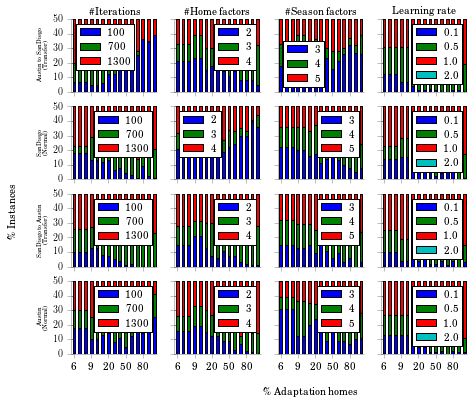

In [5]:
latexify(columns=2, fig_height=6)
fig, ax = plt.subplots(nrows=4, ncols=4, sharey=True, sharex=True)
idx = 0

a = ['\#Iterations', "", "", ""]
b = [r'\#Home factors','','','']
c = [r'\#Season factors','','','']
d = [r'Learning rate','','','']

for stot in ['Austin-to-SanDiego', 'SanDiego-to-Austin']:
    for method in ['transfer', 'normal']:
        (pd.DataFrame(iterations[stot][method])).T.plot(kind='bar', stacked='True', title=a[idx], rot=0, ax=ax[idx, 0])
        pd.DataFrame(season[stot][method]).T.plot(kind='bar', stacked='True', title=b[idx],ax=ax[idx, 1], rot=0)
        pd.DataFrame(home[stot][method]).T.plot(kind='bar', stacked='True', title=c[idx], ax=ax[idx, 2],rot=0)
        pd.DataFrame(lr[stot][method]).T.plot(kind='bar', stacked='True', title=d[idx],rot=0, ax=ax[idx,3])
        
        for k in range(4):
            format_axes(ax[idx, k])
        
        if method=="normal":
            ylab = stot.split("-")[-1] + "\n(Normal)"
        else:
            ylab = stot.replace("-", " ") + "\n(Transfer)"
        ax[idx, 0].set_ylabel(ylab, fontsize=6)
        idx += 1
n = 3
ticks = ax[0, 0].xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax[0, 0].xaxis.get_ticklabels()]
ax[0, 0].xaxis.set_ticks(ticks[::n])
ax[0, 0].xaxis.set_ticklabels(ticklabels[::n])
# for a in ax:
#     format_axes(a)
# 
f = fig.text(0.5, 0.03, "\% Adaptation homes")
g = fig.text(0, 0.5, "\% Instances",rotation=90)

# l = ax[0].set_ylabel("\% instances")
plt.savefig('../figures/params-all.pdf',bbox_inches="tight",bbox_extra_artists=[f, g])

In [17]:
out


{'Austin': {2: {'True': {'False': {'normal': {6.0: {0: {0: {'Iterations': 1300,
         'Lambda': 0,
         'Learning Rate': 1,
         'Least Train Error': 8.880894188498024,
         'Num home factors': 3,
         'Num season factors': 3},
        1: {'Iterations': 1300,
         'Lambda': 0,
         'Learning Rate': 0.5,
         'Least Train Error': 10.947049474817115,
         'Num home factors': 5,
         'Num season factors': 2},
        2: {'Iterations': 700,
         'Lambda': 0,
         'Learning Rate': 1,
         'Least Train Error': 10.731089204775806,
         'Num home factors': 5,
         'Num season factors': 2},
        3: {'Iterations': 1300,
         'Lambda': 0,
         'Learning Rate': 0.1,
         'Least Train Error': 20.400834934331492,
         'Num home factors': 5,
         'Num season factors': 4},
        4: {'Iterations': 700,
         'Lambda': 0,
         'Learning Rate': 1,
         'Least Train Error': 12.520576729319904,
         'Num home

In [38]:
out = {'Austin' :pickle.load(open('../predictions/params-lr-tf-SanDiego-Austin-static.pkl','r'))}
iterations = {}
home = {}
season = {}
lr = {}
lam = {}

case = 2
constant = 'True'
static = 'True'
       
for stot in ['Austin']:
        iterations[stot] = {}
        home[stot] = {}
        season[stot] = {}
        lr[stot] = {}
        lam[stot] = {}
        for method in ['normal']:
            iterations[stot][method] = {}
            home[stot][method] = {}
            season[stot][method] = {}
            lr[stot][method] = {}
            lam[stot][method] = {}


            for train_percentage in [6,8,10,15,20,30,40,50,60,70,80,90,100]:
                iterations[stot][method][train_percentage] = {}
                for iters in [100, 700, 1300]:
                    iterations[stot][method][train_percentage][iters] = 0

                home[stot][method][train_percentage] = {}
                for h in range(3,6):
                    home[stot][method][train_percentage][h] = 0

                season[stot][method][train_percentage] = {}
                for s in range(2,5):
                    season[stot][method][train_percentage][s] = 0

                lr[stot][method][train_percentage] = {}
                for l in [0.1, 0.5, 1, 2]:
                    lr[stot][method][train_percentage][l] = 0
                    
                lam[stot][method][train_percentage] = {}
                for la in [0.001, 0.01, 0.1, 0, 1]:
                    lam[stot][method][train_percentage][la] = 0

                for random_seed in range(5):
                    for loop in range(10):
                        iterations[stot][method][train_percentage][out[stot][case][constant][static][method][train_percentage][random_seed][loop]['Iterations']] += 1
                        home[stot][method][train_percentage][out[stot][case][constant][static][method][train_percentage][random_seed][loop]['Num home factors']] +=1
                        season[stot][method][train_percentage][out[stot][case][constant][static][method][train_percentage][random_seed][loop]['Num season factors']] +=1
                        lr[stot][method][train_percentage][out[stot][case][constant][static][method][train_percentage][random_seed][loop]['Learning Rate']] +=1
                        lam[stot][method][train_percentage][out[stot][case][constant][static][method][train_percentage][random_seed][loop]['Lambda']] +=1

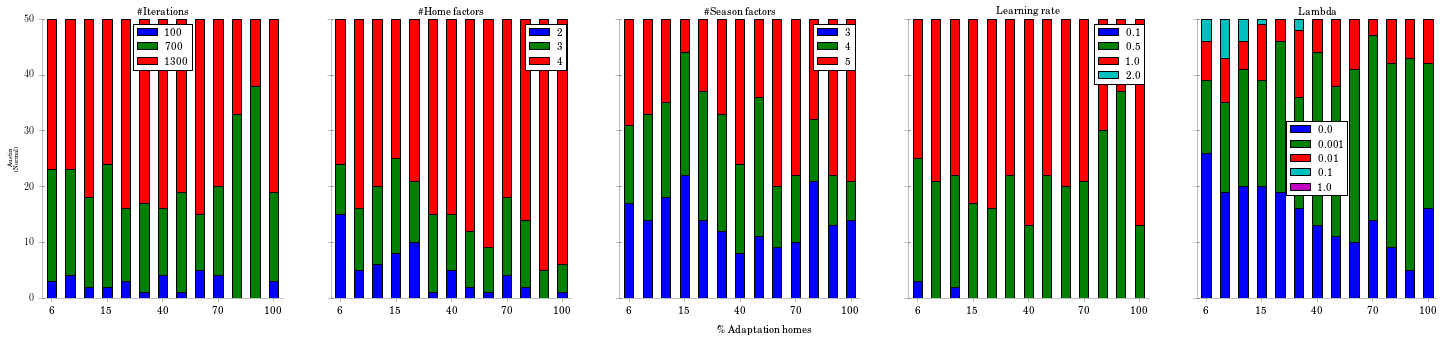

In [39]:
latexify(columns=2, fig_height=6)
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, sharex=True, figsize=(25, 5))
idx = 0

a = ['\#Iterations', "", "", ""]
b = [r'\#Home factors','','','']
c = [r'\#Season factors','','','']
d = [r'Learning rate','','','']
e = [r'Lambda','','','']

for stot in ['Austin']:
    for method in ['normal']:
        (pd.DataFrame(iterations[stot][method])).T.plot(kind='bar', stacked='True', title=a[idx], rot=0, ax=ax[0])
        pd.DataFrame(season[stot][method]).T.plot(kind='bar', stacked='True', title=b[idx],ax=ax[1], rot=0)
        pd.DataFrame(home[stot][method]).T.plot(kind='bar', stacked='True', title=c[idx], ax=ax[2],rot=0)
        pd.DataFrame(lr[stot][method]).T.plot(kind='bar', stacked='True', title=d[idx],rot=0, ax=ax[3])
        pd.DataFrame(lam[stot][method]).T.plot(kind='bar', stacked='True', title=e[idx],rot=0, ax=ax[4])
        
        for k in range(5):
            format_axes(ax[k])
        
        if method=="normal":
            ylab = stot.split("-")[-1] + "\n(Normal)"
        else:
            ylab = stot.replace("-", " ") + "\n(Transfer)"
        ax[0].set_ylabel(ylab, fontsize=6)
#         idx += 1
n = 3
ticks = ax[0].xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax[0].xaxis.get_ticklabels()]
ax[0].xaxis.set_ticks(ticks[::n])
ax[0].xaxis.set_ticklabels(ticklabels[::n])
# for a in ax:
#     format_axes(a)
# 
f = fig.text(0.5, 0.03, "\% Adaptation homes")
# g = fig.text(0, 0.5, "\% Instances",rotation=90)

# l = ax[0].set_ylabel("\% instances")
plt.savefig('../figures/params-static-{}-{}-{}.pdf'.format(case, constant, static),bbox_inches="tight",bbox_extra_artists=[f, g])

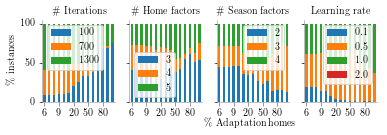

In [39]:
# latexify(columns=2, fig_height=1.5, fig_width=6)
# fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True)
# iterations.T.plot(kind='bar', stacked='True', title="\# Iterations", rot=0, ax=ax[0])
# home.T.plot(kind='bar', stacked='True', title=r"\# Home factors",ax=ax[1], rot=0)
# season.T.plot(kind='bar', stacked='True', title=r"\# Season factors", ax=ax[2],rot=0)
# lr.T.plot(kind='bar', stacked='True', title="Learning rate",rot=0, ax=ax[3])
# n = 3
# for a in ax:
#     format_axes(a)
# ticks = ax[0].xaxis.get_ticklocs()
# ticklabels = [l.get_text() for l in ax[0].xaxis.get_ticklabels()]
# ax[0].xaxis.set_ticks(ticks[::n])
# ax[0].xaxis.set_ticklabels(ticklabels[::n])
# f = fig.text(0.5, -0.1, "\% Adaptation homes")
# l = ax[0].set_ylabel("\% instances")


In [31]:
ticks[::n]

array([0])